# What is EEG?
*  EEG is a electrophysiological technique for the recording of electrical activity arising from the brain.
* Given its exquisite temporal sensitivity, the main utility of EEG is in the evaluation of dynamic cerebral functioning.

# Different Types of Electrodes  
* different electrodes give rise to different types of EEG

## Wet Electrodes


*   traditional Ag/AgCl electrodes
*   uses electrolyte gel to help reduce noise

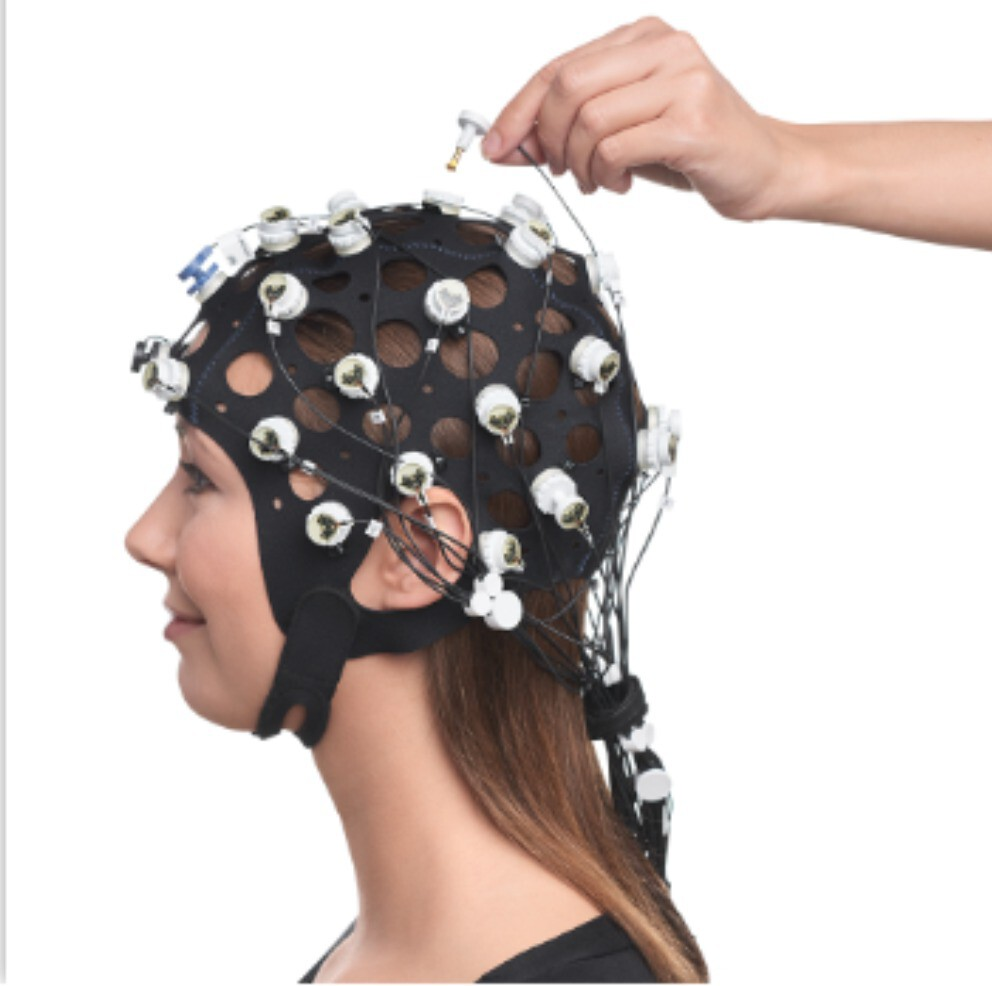

## Dry Electrodes



1.   Gold-coated single pin electrodes

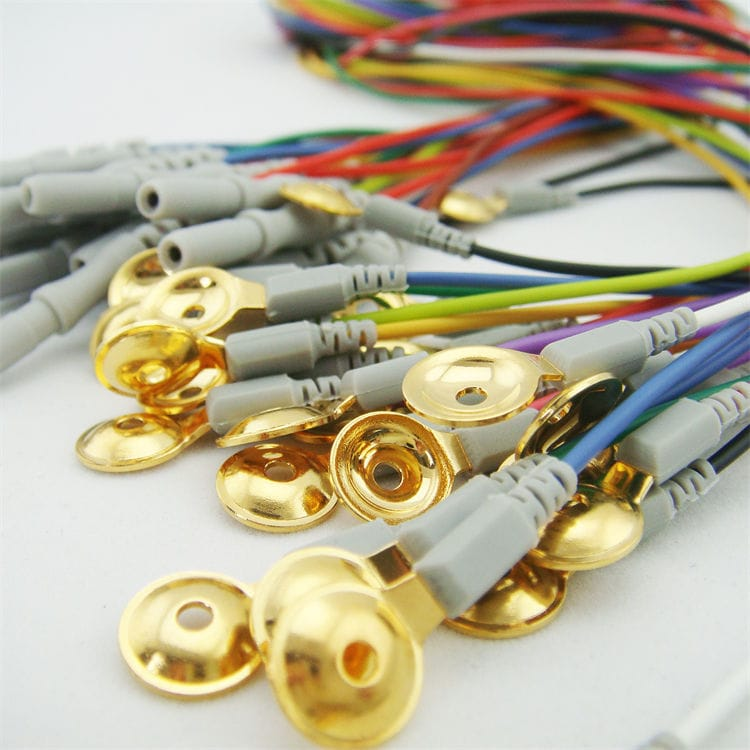

2.   Circular spike electrodes
3.   Solid-gel based electrodes

## More In Development...















# Overview of the Workshop

## Cognitive Event:
* The subject chooses one card out of four, a python program will randomly flash one of the four cards about every second, repeating 100 times. The subject is asked to count how many times their card appeared (to help them focus). We will record EEG signal while the cards are flashing.
* We will go through a series of preprocessing and ERP analysis techniques to decipher which card they chose.

## What exactly do we do?
1.   Record EEG data using OpenBCI; record time stamps of cards shown with python program.
2.   Read in data with our program.
3. Preprocessing
4. ERP Analysis
5. Make prediction

## Let's get started!



In [1]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 50.1 MB/s eta 0:00:00


# Read in EEG Data and Event Time Stamps

##***Question: What is sampling frequency?

In [4]:
"""
Created on Tue Oct 10 03:00:25 2023

@author: grace
"""
import numpy as np
import mne
import matplotlib.pyplot as plt


filename = "OpenBCI-RAW-2023-10-10_01-56-43.csv"
time = "2023-10-10 01:58:42.976102"
labels = [[533676.0, 3], [1296490.0, 4], [2456270.0, 2], [3309464.0, 3], [4393990.0, 2], [5993242.0, 1], [6609718.0, 1], [7174092.0, 1], [7734420.0, 2], [8238831.999999999, 4], [9738184.0, 3], [10203882.0, 4], [10756814.0, 1], [11312604.0, 2], [12840344.0, 4], [13308358.0, 4], [13850370.0, 1], [14407426.0, 1], [15998948.0, 2], [16475464.0, 4], [17049514.0, 2], [17554374.0, 3], [18028812.0, 4], [19589318.0, 2], [20153488.0, 2], [20715406.0, 3], [21268102.0, 2], [22762970.0, 3], [23249166.0, 3], [23804382.0, 2], [24295720.0, 3], [25839458.0, 1], [26397872.0, 2], [26864552.0, 4], [27360212.0, 3], [28926688.0, 2], [29501180.0, 3], [30045238.0, 1], [30554600.0, 3], [31110578.0, 1], [32653392.0, 1], [33216886.0, 2], [33684342.0, 4], [34150672.0, 4], [35711464.0, 1], [36263488.0, 1], [36815692.0, 2], [37363190.0, 3], [38872198.0, 3], [39344002.0, 4], [39905812.0, 2], [40394000.0, 3], [41882962.0, 3], [42371684.0, 3], [42917524.0, 1], [43474082.0, 1], [44029570.0, 2], [45506840.0, 4], [46046860.0, 3], [46588014.0, 1], [47169768.0, 2], [48749418.0, 2], [49315218.0, 1], [49801308.0, 4], [50288278.0, 3], [51844512.0, 2], [52398564.0, 2], [52886838.0, 3], [53352640.0, 4], [54949680.0, 1], [55517560.0, 2], [56104972.0, 2], [56594396.0, 3], [57061650.0, 4], [58611578.0, 1], [59097618.0, 3], [59653484.0, 2], [60116986.0, 4], [61674064.0, 2], [62166488.0, 3], [62784820.0, 2], [63276026.0, 3], [64783942.0, 3], [65272288.0, 3], [65737084.00000001, 4], [66206478.0, 4], [67676822.0, 4], [68162524.0, 3], [68716158.0, 1], [69289330.0, 1], [70833736.0, 1], [71463994.0, 1], [72035182.0, 1], [72526392.0, 3], [73066850.0, 1], [74532856.0, 4], [75099516.0, 2], [75564520.0, 4], [76160242.0, 2], [77635820.0, 4]]

channels = [[], [], [], [], [], [], [], []]
f = open(filename, 'r')
lines = f.readlines()
print(len(lines))
for line in lines:
    l = line.strip().split(", ")
    for i in range(1, 9):
        num = float(l[i])*0.001869917138805
        channels[i-1].append(num)

channels = np.array(channels)
print(channels.shape)
print(channels[0][0])
ch_names = ['1', '2', '3', '4', '5', '6', '7', '8']
sfreq = 250
ch_types = ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg']



20899
(8, 20899)
-146.04364502205223


# Create an MNE Object and Visualize Data
## Preprocessing Steps

1. Re-referencing
* mastoids
* earlobes (default with OpenBCI EEG headset)
* average of all channels

2. Bandpass Filter
* notice it is a filter of frequency, not amplitude



Creating RawArray with float64 data, n_channels=8, n_times=20899
    Range : 0 ... 20898 =      0.000 ...    83.592 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1651 samples (6.604 s)



<ipython-input-5-0ad794ca3447>:4: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Using matplotlib as 2D backend.


<ipython-input-5-0ad794ca3447>:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.plot_psd()


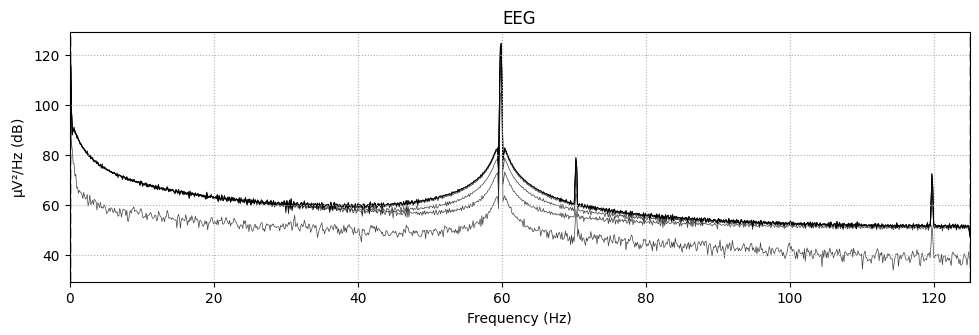

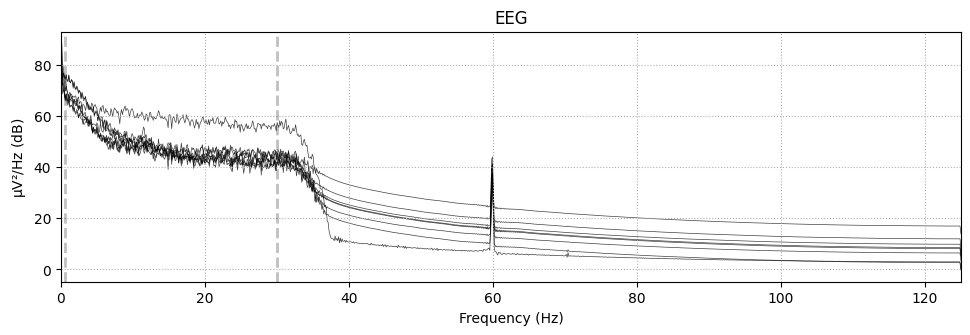

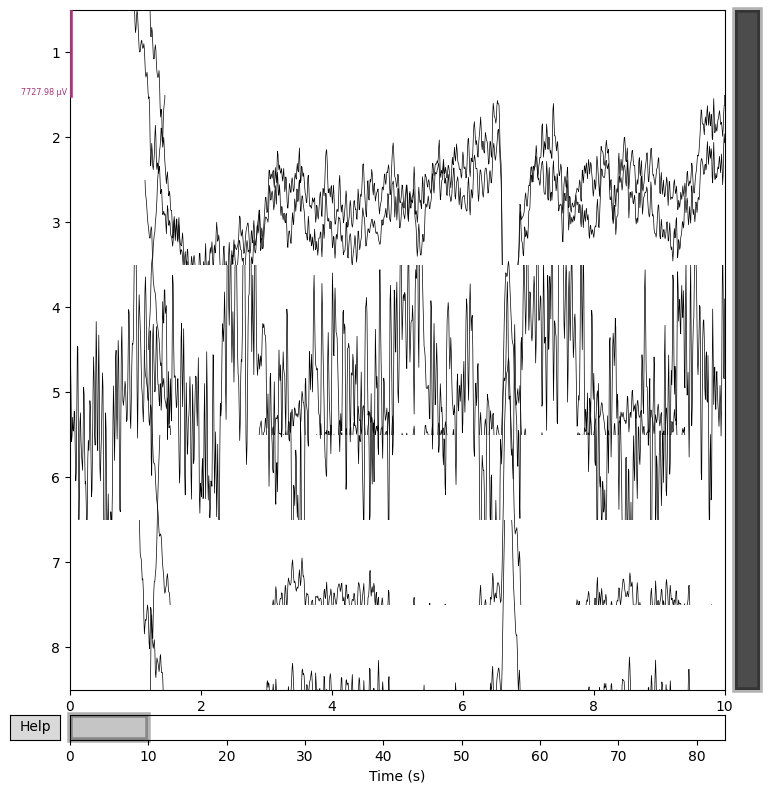

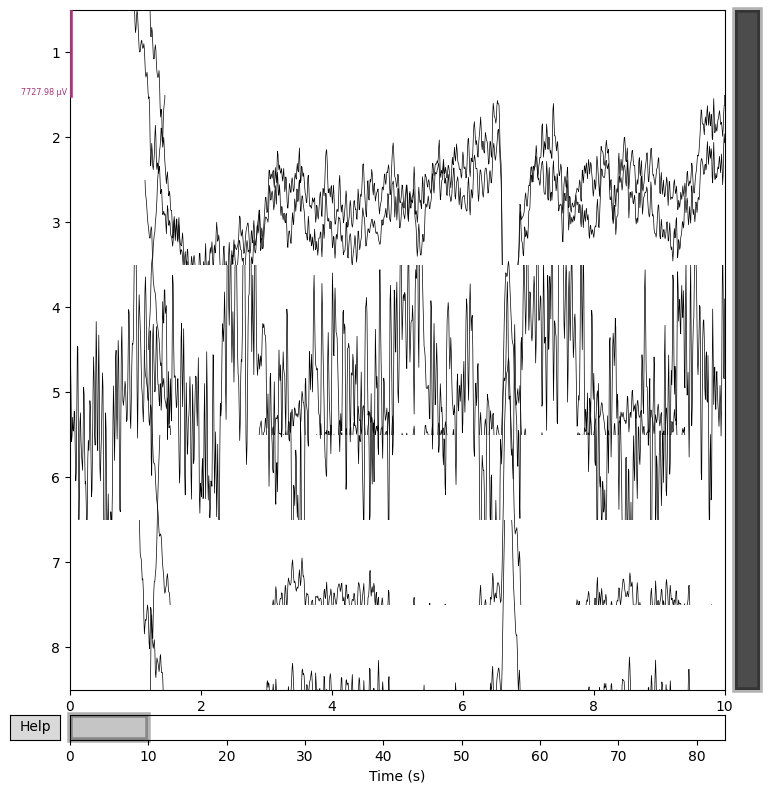

In [5]:
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(channels, info)
data, times = raw[:]
raw.plot_psd()
raw.set_eeg_reference()
filtered = raw.filter(0.5, 30)
filtered.plot_psd()
filtered.plot(scalings='auto')


# (FYI) Other Preprocessing Techniques

## Artifact Removal: Independent Component Analysis (ICA)

* important to include when the subject may experience frequency eye blinks, muscle movements, and eye movements.

* detects that there is more than one source of signal (our targeted cognitive event vs. unwanted activity from muscle/eye)

* separates those sources of signals apart, giving us signal more purely generated from our targeted cognitive event

## ***Question: ICA vs. PCA?

## Baseline Correction

* using EEG activity over a baseline period, i.e. before an external event occurs, to correct activity over a post-stimulus interval, i.e. the time after an external event occurs.


# ERP Analysis Prep

1. We take one second intervals of data after each card was shown, so now we have 100 one-second segments worth of EEG (per channel).

2. We organize these 100 segments into 4 categories, such that each category contains those EEG segments after one particular card was shown. (Ex. 25 segments for card 1, 26 segments for card 2, 24 segments for card 3, 25 segments for card 4)

3. We average the segments within each of the 4 categories, and we visualize the signal for the 4 classes of signals for each channel.

In [6]:
data, times = filtered[:]
ntrials = len(labels)
trials = np.zeros((ntrials, 8, 250))
for i in range(ntrials):
  label = labels[i][0]
  start = int(label/1000000*250)
  trials[i, :, :] = data[ :, start:start+250]


Creating RawArray with float64 data, n_channels=8, n_times=250
    Range : 0 ... 249 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=250
    Range : 0 ... 249 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=250
    Range : 0 ... 249 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=250
    Range : 0 ... 249 =      0.000 ...     0.996 secs
Ready.


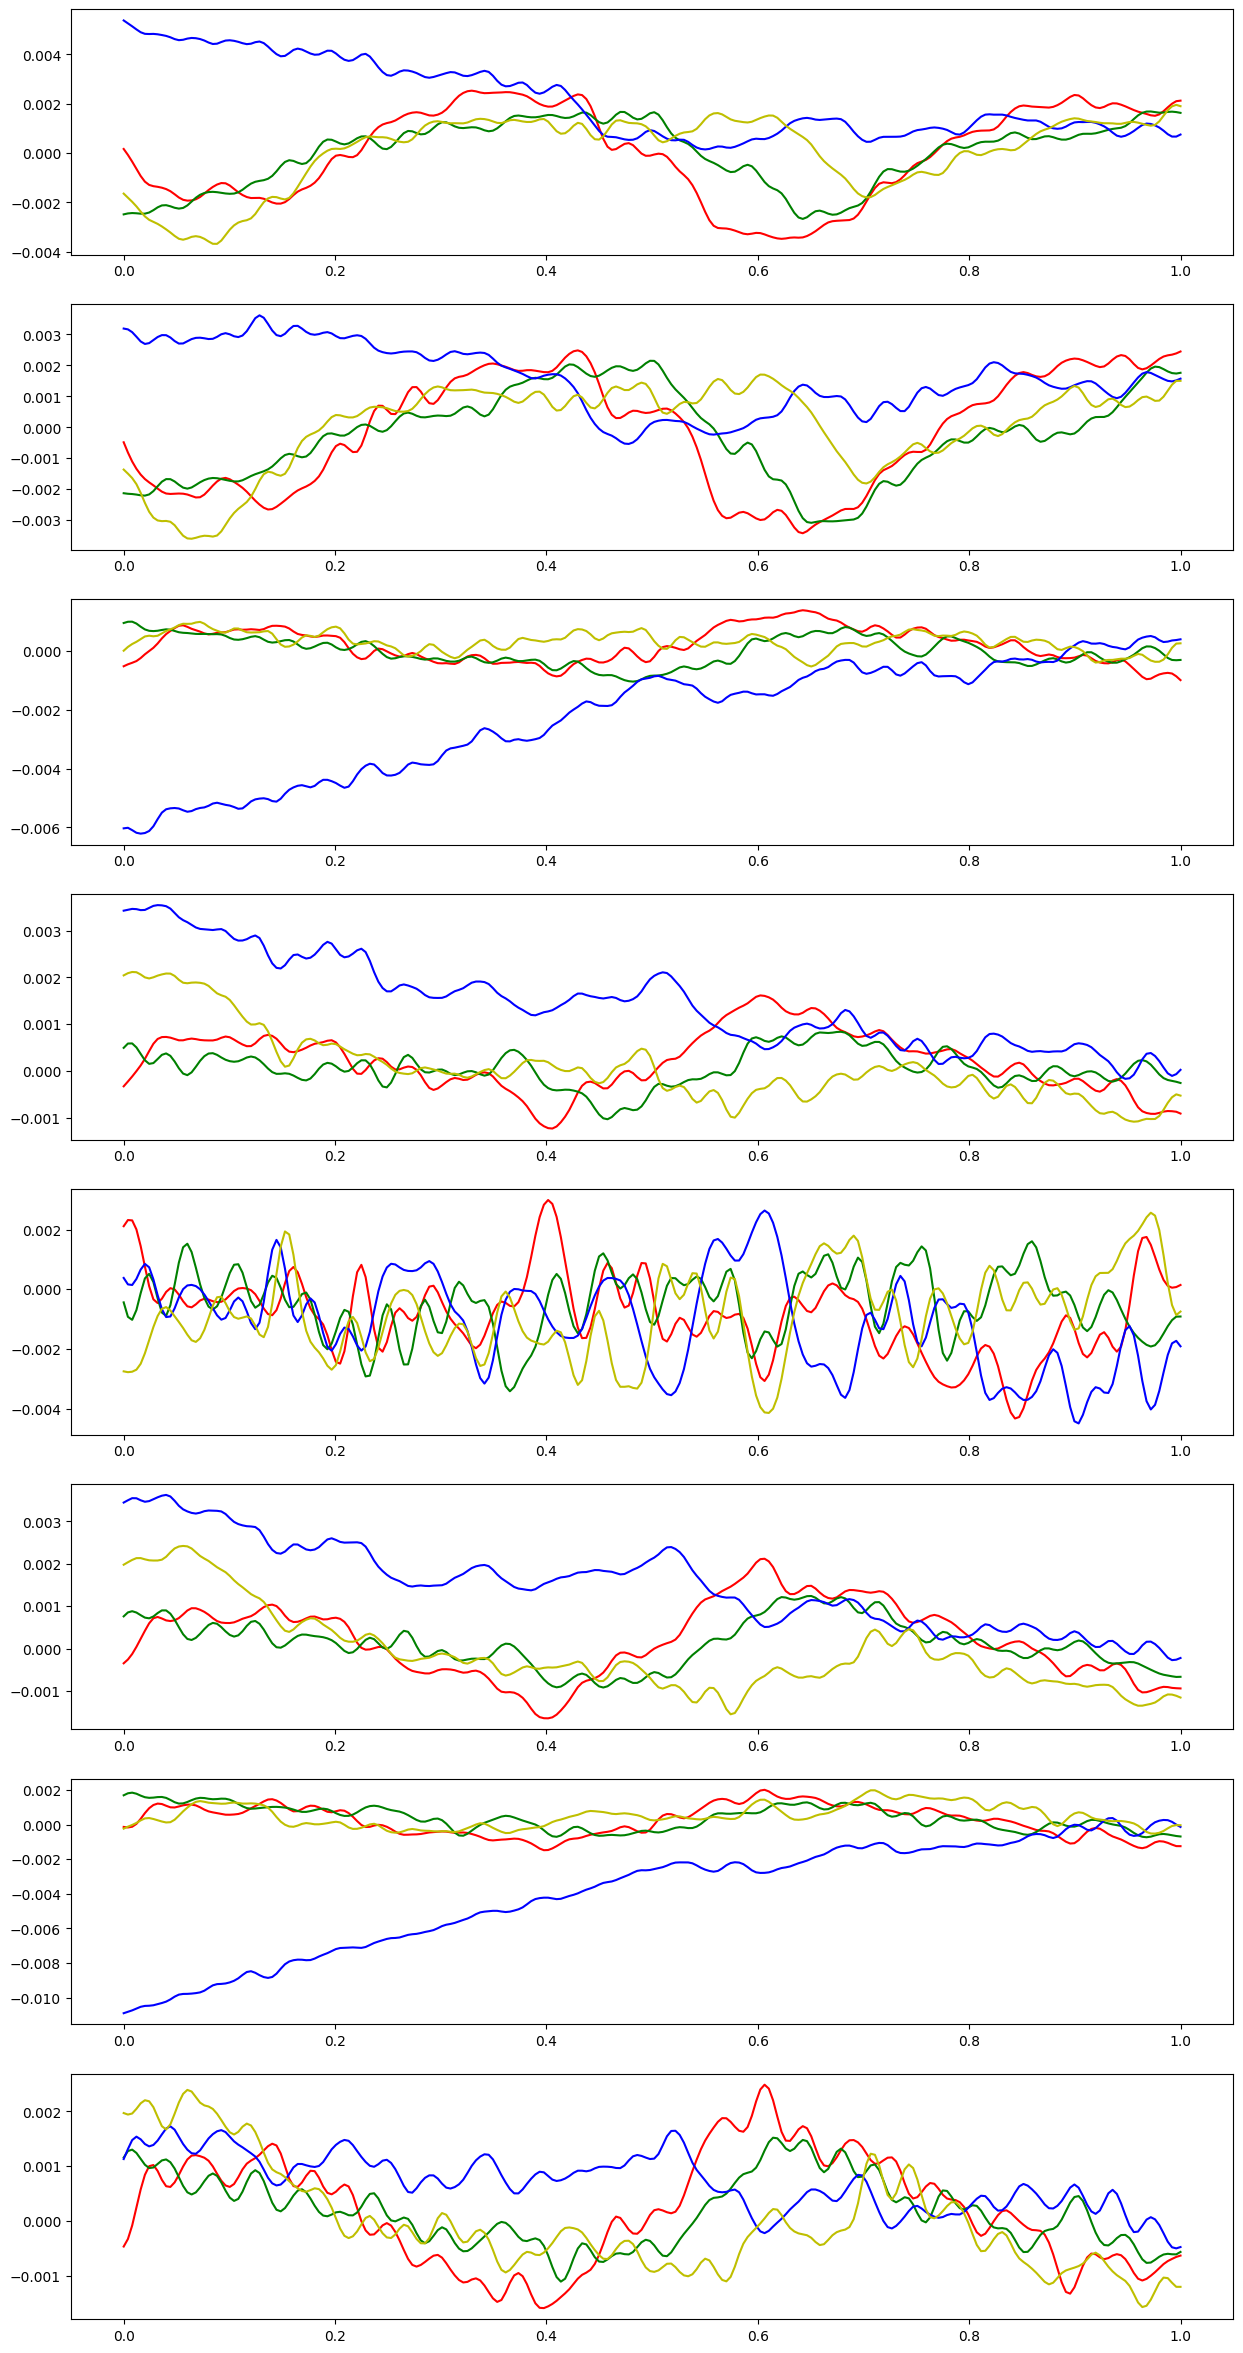

In [7]:
classes = []
for i in labels:
  classes.append(i[1])
classes = np.array(classes)
x = np.linspace ( start = 0.    # lower limit
                , stop = 1      # upper limit
                , num = 250      # generate 51 points between 0 and 3
                )
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, 1, figsize=(15, 30))
plots = {0:ax1, 1:ax2, 2:ax3, 3:ax4, 4:ax5, 5:ax6, 6:ax7, 7:ax8}
colors = {0:'r', 1:'g', 2:'b', 3:'y'}
for i in range(4):
  erp = np.mean(trials[classes == i+1, :, :], axis=0)
  raw = mne.io.RawArray(erp, info)
  #raw.plot_psd()
  for j in range(8):
    plots[j].plot(x, erp[j], colors[i])
plt.show()




#ERP Analysis: P300 Amplitudes

1. We are interested in the signal that appears ~300 ms after the stimulus is shown.

2. We take the average of the absolute value of the signal over the period 200 - 400 ms for each of the 4 categories.

3. We measure the Pearson's correlation coefficient for correlation between time of shown card and p300 amplitude.

4. Highest coefficient wins as our prediction.

In [8]:
sample_rate = 250
from_index = int(0.2 * sample_rate)
to_index = int(0.4 * sample_rate)
abs = np.absolute(trials)
p300_amplitudes = np.mean(np.mean(abs[:, :, from_index:to_index], axis=1), axis=1)

from scipy.stats import pearsonr
pearsonr(classes == 1, p300_amplitudes)[0]
nclasses = 4
scores = [pearsonr(classes == i+1, p300_amplitudes)[0] for i in range(nclasses)]
print(scores)

[-0.00929744222735068, -0.07728503366779511, 0.13532358424633292, -0.05261599806816121]


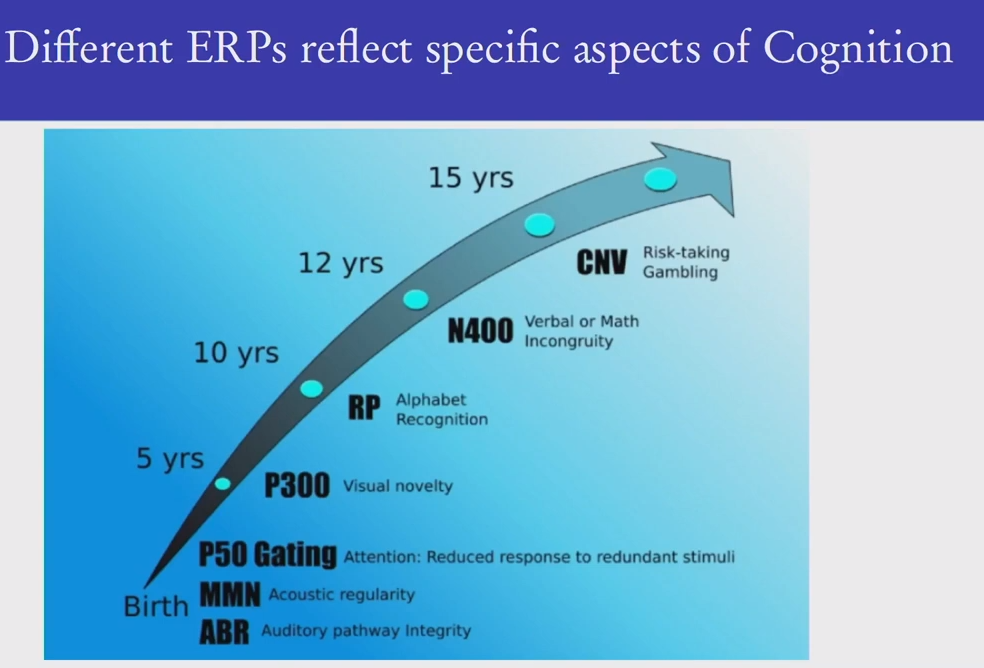

# Beyond ERP
What are some things we can do with EEG beyond ERP?
* We may be interested in long periods of data without any particular stimuli
  * Example: Sleep, long cognitive task, etc.

* Study the brain regions in detail
  * Example: Inverse Problem, Brain Mapping

# Citations
 * https://www.youtube.com/watch?v=JK-iQXhfUJc
 * https://mne.tools/dev/auto_tutorials/intro/10_overview.html
 * http://learn.neurotechedu.com/preprocessing/
 * https://github.com/NeurotechDavis/BCI-Workshops/blob/main/preprocessing_eeg_data.ipynb
 * https://deepnote.com/workspace/first-deepnote-workspace-a539-219a-c0722ed5-c143-4bee-a60e-8697652e35bc/project/neurosciencetutorials-8a4d1e5b-3b18-496f-8469-5d117ac95805/notebook/eeg-bci%2F1.%20Load%20EEG%20data%20and%20plot%20ERP-a1c760712ff74248bf04e44a28cdf7e4?
 * https://www.youtube.com/watch?v=zDTsePeDlwo
 * https://eeglab.org/tutorials/06_RejectArtifacts/RunICA.html

